In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('dane/main data/hydro_klimat_merged_data.csv')

In [3]:
data['Data'] = pd.to_datetime(data['Data'])

In [4]:
data = data.sort_values(by='Data')

In [5]:
# data_san = data[['Nazwa stacji', 'Data', \
#                 'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
#                'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
#                 'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
#                 'Nazwa rzeki/jeziora', 'Stan wody [cm]', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
#                ]] \
#             [data['Nazwa rzeki/jeziora'] == 'SAN (22)'] 

In [6]:
# data_san["Nazwa stacji"].drop_duplicates()

## ZAMIANA JEDNOSTEK (raczej tego nie potrzebuję, bo i tak normalizuję późniejdane)

In [7]:
# data["Suma dobowa opadów [cm]"] = data["Suma dobowa opadów [mm]"].apply(lambda x: x*0.1 ) 
#WYPROBOWAĆ JESZCZE TO 
# data["Suma dobowa opadów [cm]"] = data["Suma dobowa opadów [mm]"]*0.1

In [8]:
# data["Suma dobowa opadów nowa [cm]"] = data["Suma dobowa opadów nowa [mm]"]*0.1

In [9]:
# data["Przepływ [cm^3/s]"] = data["Przepływ [m^3/s]"].apply(lambda x: x*100**3)

In [10]:
# wybrana_stacja = "PSZCZYNA"

In [11]:
# data_stacja = data[data["Nazwa stacji"] == wybrana_stacja]
# data_stacja.shape

In [12]:
# data_stacja.describe()

In [13]:
plt.hist(data_stacja['Przepływ [cm^3/s]'])
plt.title('Histogram przepływu [cm^3/s] dla stacji Pszczyna')
plt.show()

NameError: name 'data_stacja' is not defined

In [ ]:
kolumna = data_stacja['Suma dobowa opadów [cm]']
plt.hist(kolumna)
plt.title('Histogram dobowej sumy opadów [cm] dla stacji Pszczyna')
plt.show()

In [ ]:
plt.hist(data_stacja['Stan wody [cm]'])
plt.title('Histogram stanu wody [cm] dla stacji Pszczyna')
plt.show()

In [ ]:
plt.hist(data_stacja['Średnia temperatura dobowa [°C]'])
plt.title('Histogram średniej temperatury dobowej [°C] dla stacji Pszczyna')
plt.show()

In [23]:
data_san = data[['Nazwa stacji', 'Data', \
                'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
               'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
                'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
                'Nazwa rzeki/jeziora', 'Stan wody [cm]', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
               ]][data['Nazwa rzeki/jeziora'] == 'INA (198)'] 
#             [data['Nazwa rzeki/jeziora'] == 'SAN (22)'] 
            

### MOJA SIEĆ NA PODSTAWIE 

https://medium.com/hydroinformatics/an-example-of-forecasting-water-levels-using-an-lstm-53d4434a1d7f

utowrzenie zmiennych, które będą przechowywać dane z potrzebnych kolumn

In [ ]:
# dzien = data_stacja[(data_stacja['Data'] > '2021-03-03') & (data_stacja['Data'] < '2022-01-01')]['Data']
# suma_opadow_pszcz = data_stacja\
#     [(data_stacja['Data']+ pd.Timedelta(days=61) >='2021-01-01') \
#      & (data_stacja['Data']+ pd.Timedelta(days=61) < '2022-01-01')]['Suma dobowa opadów [cm]']
# poziom_wody_pszcz = data_stacja[(data_stacja['Data'] > '2021-03-03') & (data_stacja['Data'] < '2022-01-01')]['Stan wody [cm]']
# przeplyw_pszcz = data_stacja[(data_stacja['Data'] > '2021-03-03') &(data_stacja['Data'] < '2022-01-01')]['Przepływ [cm^3/s]']

1. model tylko rok

In [14]:
# dzien = data_stacja[data_stacja['Data'] < '2022-01-01']['Data']
# suma_opadow_pszcz = data_stacja[data_stacja['Data'] < '2022-01-01']['Suma dobowa opadów [cm]']
# poziom_wody_pszcz = data_stacja[data_stacja['Data'] < '2022-01-01']['Stan wody [cm]']
# przeplyw_pszcz = data_stacja[data_stacja['Data'] < '2022-01-01']['Przepływ [cm^3/s]']

### Feature selection

In [15]:
from sklearn.feature_selection import VarianceThreshold

# Resetting the value of X to make it non-categorical


In [16]:
#inna metoda do wyprowania
# Zero-out Method (ablation)
# #
#     Ustawiasz jedną cechę na 0 i patrzysz, jak zmienia się wynik.

2. model na całych danych

In [24]:
dzien = data_san['Data']
suma_opadow_san = data_san['Suma dobowa opadów nowa [mm]']
poziom_wody_san = data_san['Stan wody [cm]']
przeplyw_san = data_san['Przepływ [m^3/s]']
temp_sr_san = data_san['Średnia temperatura dobowa [°C]']
pokr_sn_san = data_san['Wysokość pokrywy śnieżnej [cm]']
temp_min_grunt_san = data_san['Temperatura minimalna przy gruncie [°C]']

In [ ]:
# data_stacja['Data']

#### Wykres

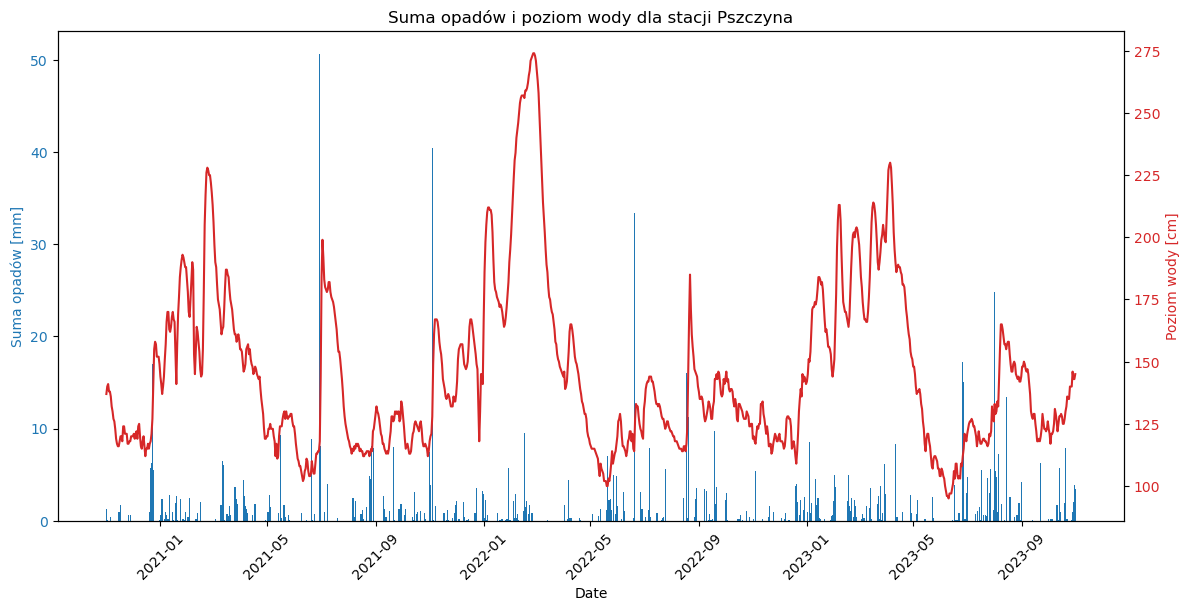

In [25]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Suma opadów [mm]', color=color)
# ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
ax1.bar(dzien, suma_opadow_san, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# #ustawienie osi X
# ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
plt.xticks(rotation=45)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Poziom wody [cm]', color=color)
ax2.plot(dzien, poziom_wody_san, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure no overlap of y-axis labels
plt.title('Suma opadów i poziom wody dla stacji Pszczyna')
plt.show()

#### Normalizacja (w złym miejscu powinna być tylko na train

Now that we have a visualisation of our data, the next important step is to normalise it. Normalisation is very important, especially when it comes to LSTM models. It makes sure that data with different scales of magnitude do not change the way the model is trained. We help the model learn better by making all of our traits fall within the same range.

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the scaler
scaler = MinMaxScaler()

# Combine and scale the data
# combined_data = pd.concat([suma_opadow_san, poziom_wody_san, przeplyw_san, pokr_sn_san, temp_min_grunt_san], axis=1)
combined_data = pd.concat([suma_opadow_san, poziom_wody_san, przeplyw_san, temp_min_grunt_san], axis=1)
features_num = combined_data.shape[1]
scaled_data = scaler.fit_transform(combined_data)

In [34]:
features_num

4

#### Podział zbioru: Train (70%), Validate (20%), Test (10%)

In [27]:
total_samples = len(scaled_data)
train_end = int(total_samples * 0.7)
validation_end = int(total_samples * 0.9)

train_data = scaled_data[:train_end]
validation_data = scaled_data[train_end:validation_end]
test_data = scaled_data[validation_end:]

#### statistical check

In [29]:
columns = ['Suma opadów [cm]', 'Poziom wody [cm]', 'Przepływ [cm^3/s]', 'Temperatura minimalna przy gruncie [°C]']
#            Wysokość pokrywy śnieżnej [cm],\
#            'Temperatura minimalna przy gruncie [°C]']  # Adjust as per your actual data columns
train_df = pd.DataFrame(train_data, columns=columns)
validation_df = pd.DataFrame(validation_data, columns=columns)
test_df = pd.DataFrame(test_data, columns=columns)

# Calculate statistical properties for each dataset
stats_train = train_df.describe().loc[['mean', 'std', 'min', 'max']]
stats_validation = validation_df.describe().loc[['mean', 'std', 'min', 'max']]
stats_test = test_df.describe().loc[['mean', 'std', 'min', 'max']]

# Compare the statistics
print("Training Data Stats:\n", stats_train, "\n")
print("Validation Data Stats:\n", stats_validation, "\n")
print("Testing Data Stats:\n", stats_test, "\n")

Training Data Stats:
       Suma opadów [cm]  Poziom wody [cm]  Przepływ [cm^3/s]  \
mean          0.021463          0.275807           0.226335   
std           0.069694          0.194515           0.190577   
min           0.000000          0.027933           0.022467   
max           1.000000          1.000000           1.000000   

      Temperatura minimalna przy gruncie [°C]  
mean                                      0.0  
std                                       0.0  
min                                       0.0  
max                                       0.0   

Validation Data Stats:
       Suma opadów [cm]  Poziom wody [cm]  Przepływ [cm^3/s]  \
mean          0.018229          0.327288           0.279420   
std           0.041434          0.204974           0.187340   
min           0.000000          0.000000           0.013216   
max           0.339921          0.754190           0.696035   

      Temperatura minimalna przy gruncie [°C]  
mean                            

Wyszły na oko podobne średnie, czy zrobić tu jakiś test statystyczny?

In [30]:
# from scipy.stats import mannwhitneyu

# # stats_train_sum_op_mean = float(stats_train['Suma opadów [cm]'].loc[['mean']])
# # stats_validation_sum_op_mean = float(stats_validation['Suma opadów [cm]'].loc[['mean']])

# u_stat, p_value = mannwhitneyu(train_df['Suma opadów [cm]'], validation_df['Suma opadów [cm]'])
# print(f"U-stat: {u_stat}, p-value: {p_value}")

**Wnioski**

Ponieważ p-value < 0.05, różnica między grupami jest istotna statystycznie. Możliwe, że jedna grupa ma znacząco wyższe lub niższe wartości niż druga. 

#### Utworzenie sekwencji, aby można było predykować na szeregach czasowych 

To leverage TensorFlow and LSTM models, we must convert our time series data into sequences. Each sequence will contain a set of features from previous time steps, and the target will be the water level at the next time step. This setup mimics the process of learning from the past to predict the future, a core principle in time series forecasting.

In [31]:
def create_sequences(input_data, n_steps, n_ahead=1):
    X, y = [], []
    for i in range(len(input_data) - n_steps - n_ahead + 1):
        # Define the end index for the input sequence and output value
        end_ix = i + n_steps
        # Extract the sequence of features (excluding the first column if it's rainfall)
        # and the target value(s) (last column for WL)
        seq_x = input_data[i:end_ix, :]  # Excludes first column (rainfall) and last column (target WL)
        seq_y = input_data[end_ix, 1]  # Target WL, one step ahead
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [32]:
n_steps = 30 #długość sekwencji
# For forecasting 1 time steps ahead
X_train, y_train = create_sequences(train_data, n_steps=n_steps, n_ahead=1)
X_validation, y_validation = create_sequences(validation_data, n_steps=n_steps, n_ahead=1)
X_test, y_test = create_sequences(test_data, n_steps=n_steps, n_ahead=1)

In [33]:
type(train_data)

numpy.ndarray

#### definicja modelu

In [1]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError

# Budowanie modelu z przestrzenią hiperparametrów
def build_model(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm', min_value=16, max_value=64, step=8),
        activation='relu',
        input_shape=(n_steps, features_num)
    ))
    
    model.add(BatchNormalization())
    
    # Gęsta warstwa
    model.add(Dense(
        units=hp.Int('units_dense', min_value=8, max_value=32, step=4),
        activation='relu'
    ))

    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model


KeyboardInterrupt: 

Optymalizacja hiperparametrów

In [136]:
import keras_tuner as kt

In [137]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm')}, Dense: {best_hps.get('units_dense')}, LR: {best_hps.get('learning_rate')}")

Trial 10 Complete [00h 00m 17s]
val_loss: 0.02156752161681652

Best val_loss So Far: 0.020762590691447258
Total elapsed time: 00h 08m 53s
Najlepsze hiperparametry: LSTM: 64, Dense: 8, LR: 0.009729150140839459


Model z dobranymi hiperparametrami



In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(n_steps, features_num)),  # '2' represents the number of features in each time step
    BatchNormalization(),
    Dense(8, activation="relu"),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


#### fitowanie modelu (uwaga, zawsze puszczać najpierw definicję, bo kolejne puszczenie fitowania "doucza" obecny model!!)


In [139]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation)
)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - loss: 0.0268 - val_loss: 0.0789
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0133 - val_loss: 0.0588
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0042 - val_loss: 0.0496
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0024 - val_loss: 0.0443
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0019 - val_loss: 0.0431
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0021 - val_loss: 0.0431
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0021 - val_loss: 0.0409
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0020 - val_loss: 0.0403
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0032 - val_loss: 0.0393
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0021 - val_loss: 0.0354
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0016 - val_loss: 0.0383
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/st

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 133/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 5.7896e-04 - val_loss: 7.3017e-04
Epoch 134/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 7.8443e-04 - val_loss: 0.0012
Epoch 135/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 7.2188e-04 - val_loss: 6.2136e-04
Epoch 136/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.9287e-04 - val_loss: 5.3039e-04
Epoch 137/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.7601e-04 - val_loss: 4.4995e-04
Epoch 138/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.0753e-04 - val_loss: 5.2669e-04
Epoch 139/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.7773e-04 - val_loss: 0.0015
Epoch 140/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0011 - val_loss: 5.9847e-04
Epoch 141/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.2512e-04 - val_loss: 0.0066
Epoch 142/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.6363e-04 - val

Epoch 196/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 4.4189e-04 - val_loss: 5.2851e-04
Epoch 197/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 7.2796e-04 - val_loss: 0.0014
Epoch 198/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 5.4692e-04 - val_loss: 0.0037
Epoch 199/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 8.2206e-04 - val_loss: 0.0010
Epoch 200/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 4.9444e-04 - val_loss: 0.0010


#### statystyki modelu

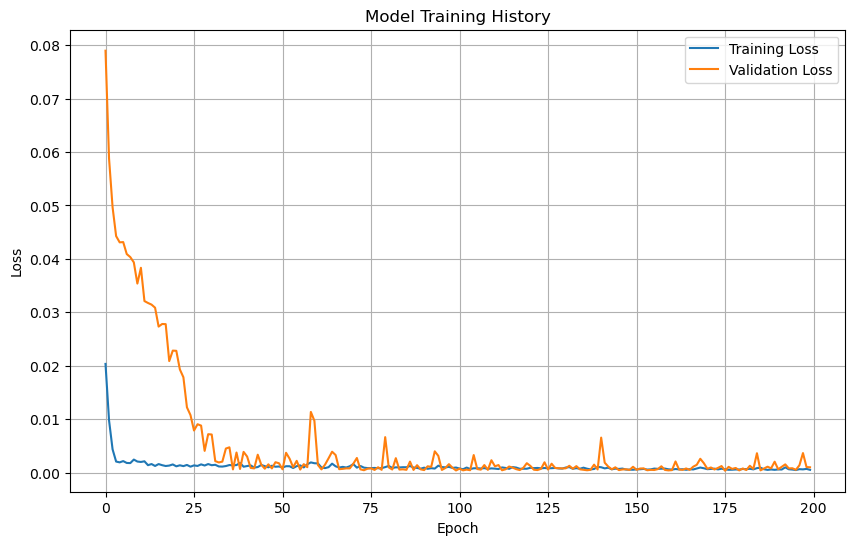

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Ocena predykcji

In [141]:
def plot_predictions_with_error(true_data, predicted_data, title):
    plt.figure(figsize=(10, 12))
    
    # Flatten arrays to ensure compatibility with matplotlib
    true_data_flatten = true_data.flatten()
    predicted_data_flatten = predicted_data.flatten()
    
    # Calculate error
    error = true_data_flatten - predicted_data_flatten
    positive_error_std = np.std(error[error >= 0])
    negative_error_std = np.std(error[error < 0])
    mae = sum(np.abs(error))/len(error)
    print(f"Błąd MAE {mae}")
    # Plot true data vs. predicted data
    ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    ax1.plot(true_data_flatten, label='True Data')
    ax1.plot(predicted_data_flatten, label='Predicted Data', alpha=0.7)
    ax1.set_title(title)
    ax1.set_ylabel('Value')
    #ustawienie stałej skali na osi Y, gdy używam oryginalnej skali danych, nie mieszczacej się w zakresie [0,1]
    if true_data[0] > 1:
        ax1 = plt.gca()
#         ax1.set_ylim([0, 260]) #San
        ax1.set_ylim([0, 15]) #Ina
    ax1.legend()

In [142]:
train_pred = model.predict(X_train)
validation_pred = model.predict(X_validation)
test_pred = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Wyniki w przeskalowanej formie

Training MAE
Błąd MAE 0.02245852916118254
Validation MAE
Błąd MAE 0.02529210557084822
Test MAE
Błąd MAE 0.01713189940753927


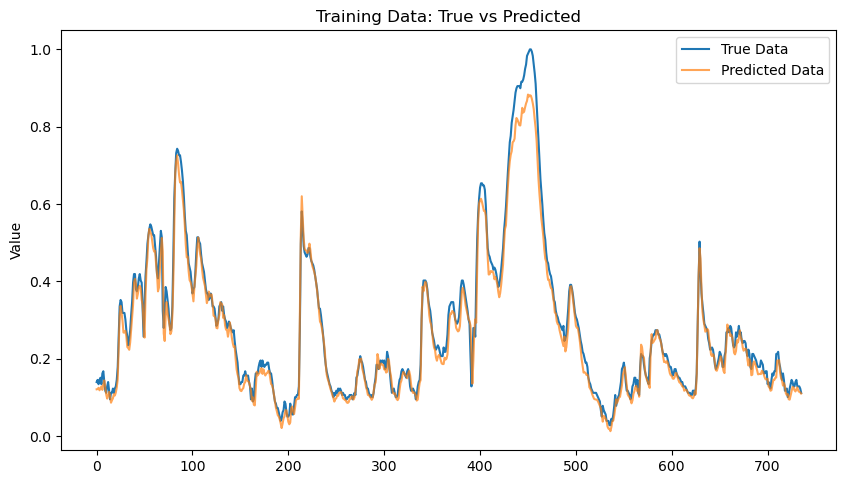

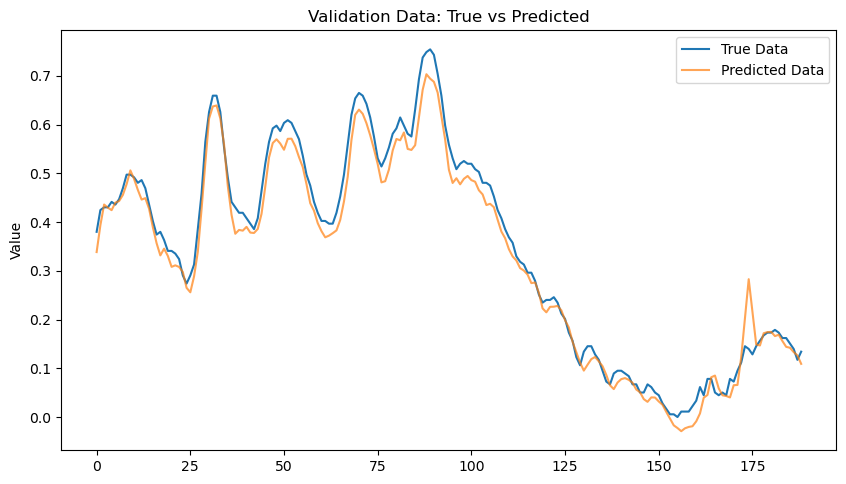

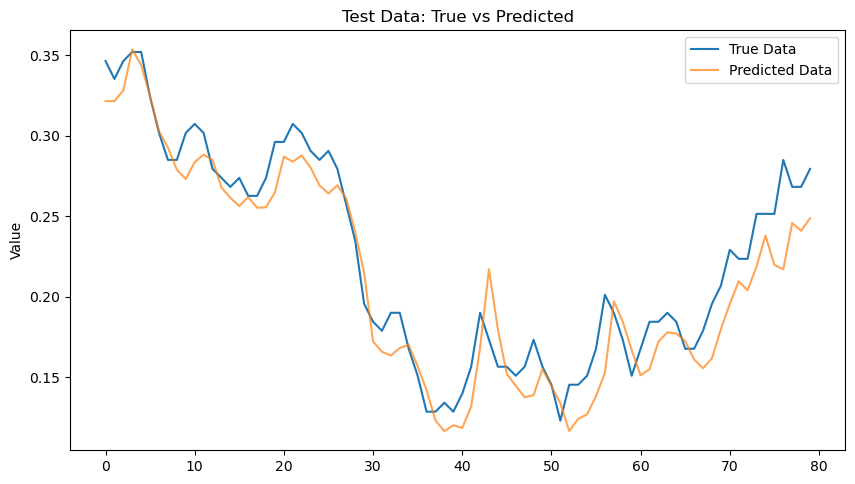

In [143]:
print("Training MAE")
plot_predictions_with_error(y_train, train_pred, 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(y_validation, validation_pred, 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(y_test, test_pred, 'Test Data: True vs Predicted')
# plot_predictions_with_error(y_test, test_pred, 'Test Data: True vs Predicted')

Transformacja wyników do początkowej skali

In [70]:
def reverse_scaler(dataset):  
    dataset = dataset.reshape(-1,1)
    inverted = np.zeros((len(dataset), features_num))
    # # Wstaw predykcję do odpowiedniej kolumny (pozostałe zostają zerami)
    inverted[:, 2] = dataset[:, 0]

    # # Odwróć skalowanie
    inverted_original = scaler.inverse_transform(inverted)
    return inverted_original[:, 2]

Training MAE
Błąd MAE 0.557819829105492
Validation MAE
Błąd MAE 0.6167315472416655
Test MAE
Błąd MAE 0.5276046026105592


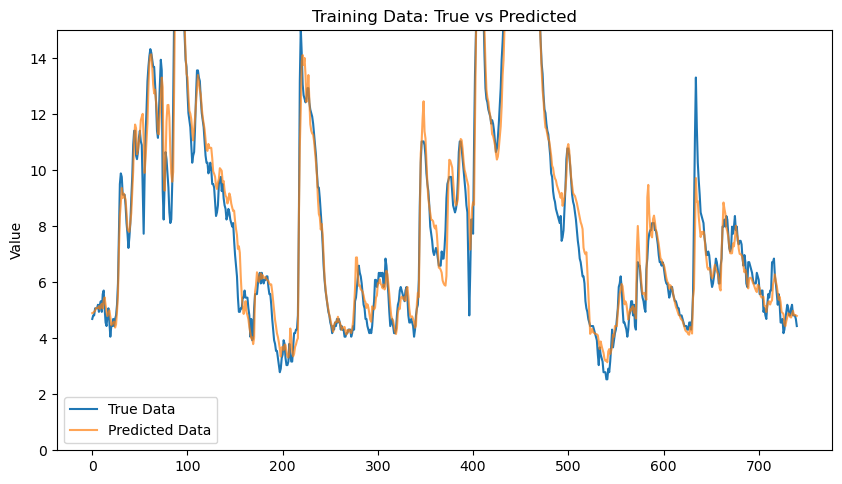

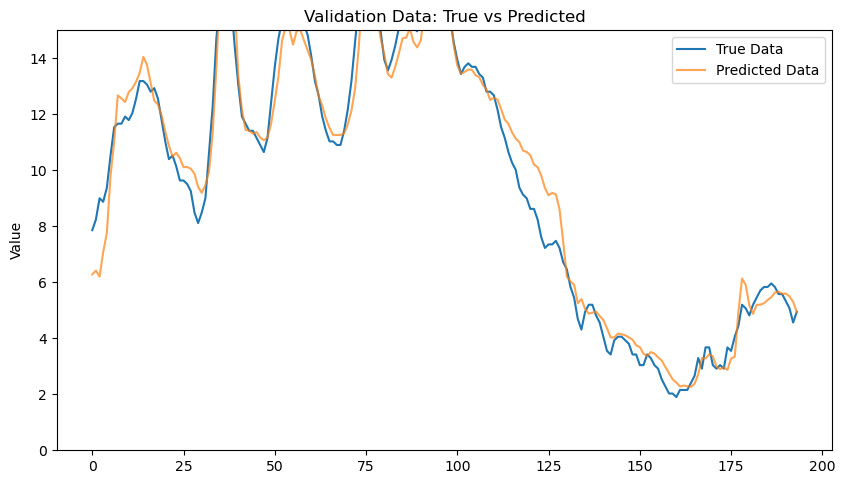

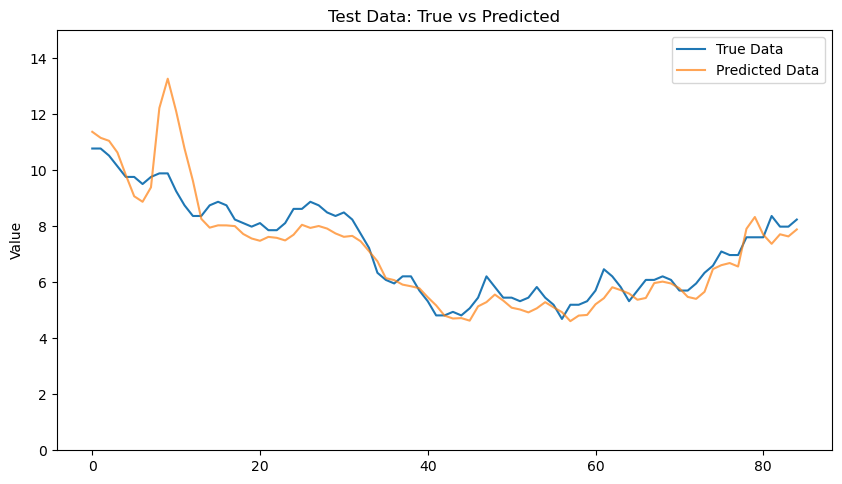

In [71]:
print("Training MAE")
plot_predictions_with_error(reverse_scaler(y_train), reverse_scaler(train_pred), 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(reverse_scaler(y_validation), reverse_scaler(validation_pred), 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(reverse_scaler(y_test), reverse_scaler(test_pred), 'Test Data: True vs Predicted')

In [424]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


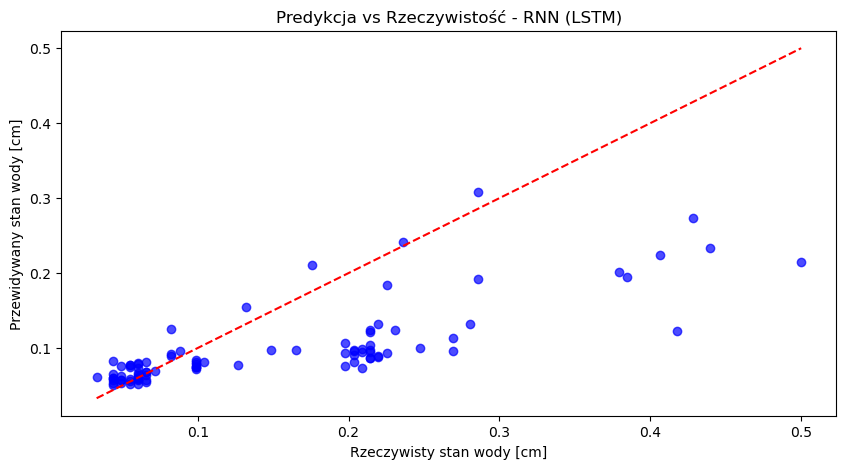

In [219]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość - RNN (LSTM)")
plt.show()

Powrót do skali początkowej

In [ ]:
import numpy as np
# y_test, test_pred
# Utwórz pustą tablicę z samymi zerami
inverted = np.zeros((len(y_test), features_num))

# Wstaw predykcję do odpowiedniej kolumny (pozostałe zostają zerami)
inverted[:, 2] = pred_scaled[:, 0]

# Odwróć skalowanie
inverted_original = scaler.inverse_transform(inverted)

# Wyciągnij tylko kolumnę z denormalizowanym przepływem
pred_original = inverted_original[:, 2]


In [101]:
# reshape Y_train i Y_test do 2D
trainY = y_train.reshape(-1, 1)
testY = y_test.reshape(-1, 1)

# 🛠 Usuń zbędny wymiar z trainPredict i testPredict
train_pred = train_pred.reshape(-1, 1)
test_pred = test_pred.reshape(-1, 1)

In [102]:
train_pred.shape

(759, 1)

In [103]:
# invert predictions to original scale
trainPredict = scaler.inverse_transform(train_pred)
testPredict = scaler.inverse_transform(test_pred)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, train_pred))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = np.sqrt(mean_squared_error(testY, test_pred))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: non-broadcastable output operand with shape (759,1) doesn't match the broadcast shape (759,3)

INNE TESTOWE SIECI

Prosta sieć LSTM dla jednej stacji

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding

In [203]:
# help(layers.LSTM)

C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 1, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 29,985 (117.13 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - loss: 48927.7695 - mae: 220.6836 - val_loss: 47919.0703 - val_mae: 218.3185
Epoch 2/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 45479.2148 - mae: 212.5246 - val_loss: 40526.5312 - val_mae: 200.1563
Epoch 3/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 38953.1484 - mae: 195.8499 - val_loss: 28057.6523 - val_mae: 166.6411
Epoch 4/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24739.9395 - mae: 155.7773 - val_loss: 11425.8145 - val_mae: 104.9867
Epoch 5/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8452.6250 - mae: 89.6220 - val_loss: 3421.1091 - val_mae: 52.3188
Epoch 6/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1999.7642 - mae: 41.2398 - val_loss: 1424.0334 - val_mae: 21.6001
Epoch 7/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 463.3452 - mae: 15.0086 - val_loss: 807.4083 - val_mae: 10.3553
Epoch 8/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 246.2812 - mae: 8.5744 - val_

Epoch 53/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22.1433 - mae: 2.9445 - val_loss: 415.9595 - val_mae: 3.7229
Epoch 54/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 21.7224 - mae: 2.9279 - val_loss: 416.4800 - val_mae: 3.7230
Epoch 55/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 21.3092 - mae: 2.9113 - val_loss: 416.8599 - val_mae: 3.7227
Epoch 56/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20.8991 - mae: 2.8937 - val_loss: 417.2779 - val_mae: 3.7220
Epoch 57/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20.4886 - mae: 2.8750 - val_loss: 416.4904 - val_mae: 3.7278
Epoch 58/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20.0744 - mae: 2.8561 - val_loss: 416.3914 - val_mae: 3.7396
Epoch 59/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 19.6546 - mae: 2.8355 - val_loss: 416.3592 - val_mae: 3.7540
Epoch 60/150
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 19.2279 - mae: 2.8139 - val_loss: 417.0639 - val_mae: 3.7712
Epoch 61/150
109

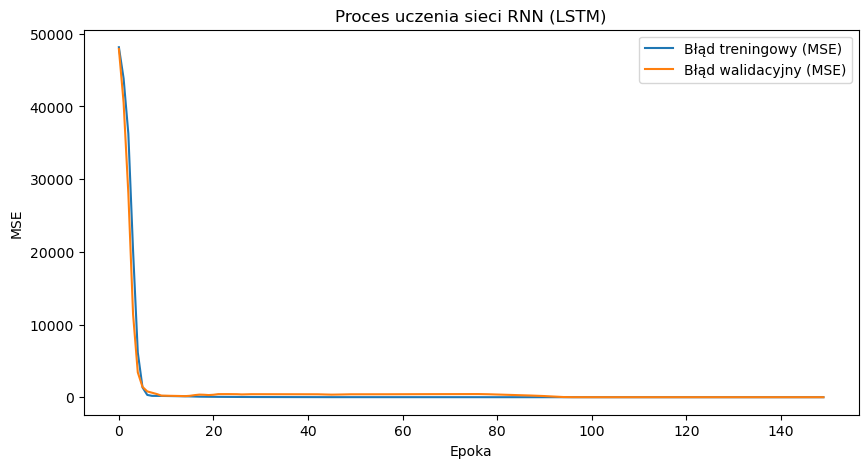

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 766ms/step


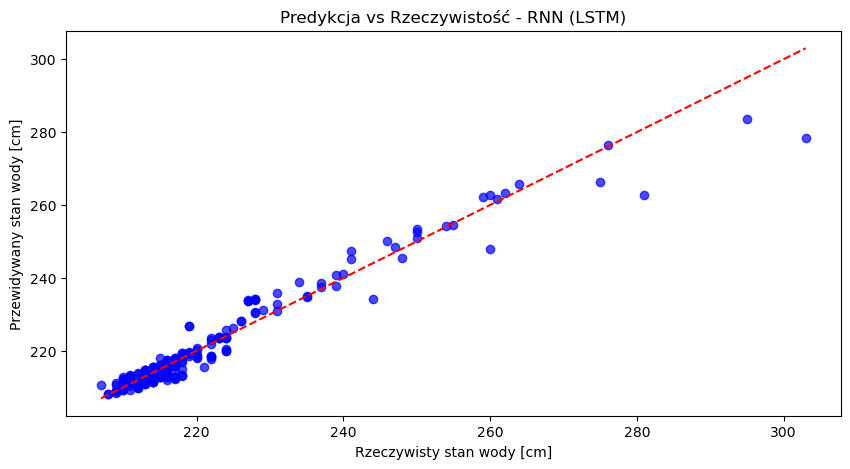

In [48]:
# 🔹 Wczytanie danych
df = data_stacja.copy()

# 📌 Konwersja 'Data' na datetime
df['Data'] = pd.to_datetime(df['Data'])

# 📌 Wybór cech (X) i etykiety (y)
# features = ['Przepływ [cm^3/s]', 'Suma dobowa opadów [cm]', 'Średnia temperatura dobowa [°C]'] #przy 150 epokach mae 2.1-2.4
features = ['Przepływ [cm^3/s]'] #przy 150 epokach mae 2.1-2.4
# features = ['Suma dobowa opadów [cm]', 'Średnia temperatura dobowa [°C]'] #mae 8
target = 'Stan wody [cm]'


X = df[features].values
y = df[target].values

# 📌 Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Kształtowanie danych dla LSTM (RNN wymaga 3D: [samples, time_steps, features])
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (próbki, kroki czasowe, cechy)

# 📌 Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# 🔹 **Budowa modelu RNN (LSTM)**
model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),  # Warstwa LSTM
    layers.BatchNormalization(),  # Normalizacja dla stabilniejszego uczenia
    layers.LSTM(32),  # Druga warstwa LSTM
    layers.Dense(16, activation="relu"),  # Warstwa ukryta
    layers.Dense(1)  # Warstwa wyjściowa (1 neuron - regresja)
])

# 🔹 **Kompilacja modelu**
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 🔹 **Wyświetlenie architektury modelu**
print(model.summary())

# 🔹 **Trening modelu**
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8, verbose=1)

# 🔹 **Wizualizacja procesu uczenia**
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Błąd treningowy (MSE)")
plt.plot(history.history["val_loss"], label="Błąd walidacyjny (MSE)")
plt.xlabel("Epoka")
plt.ylabel("MSE")
plt.legend()
plt.title("Proces uczenia sieci RNN (LSTM)")
plt.show()

# 🔹 **Predykcja na zbiorze testowym**
y_pred = model.predict(X_test)

# 🔹 **Wizualizacja predykcji vs rzeczywistość**
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość - RNN (LSTM)")
plt.show()

### Wykorzystanie większych okienek czasowych

Kształt X_seq: (1082, 1, 1)


C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 16)               │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 16)               │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,057 (8.04 KB)

 Trainable params: 2,025 (7.91 KB)

 Non-trainable params: 32 (128.00 B)

None
Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 49492.8164 - mae: 221.9213 - val_loss: 46729.5156 - val_mae: 216.0808
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 49107.5117 - mae: 221.0822 - val_loss: 45836.6055 - val_mae: 213.9972
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48480.0586 - mae: 219.5248 - val_loss: 44518.8672 - val_mae: 210.8936
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 47215.0039 - mae: 216.6438 - val_loss: 43295.1602 - val_mae: 207.9824
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 45717.3320 - mae: 213.2210 - val_loss: 41976.5391 - val_mae: 204.7885
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 43960.3438 - mae: 209.2152 - val_loss: 40565.9766 - val_mae: 201.3150
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 43056.6953 - mae: 206.8093 - val_loss: 39100.7891 - val_mae: 197.6425
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 40978.2070 - ma

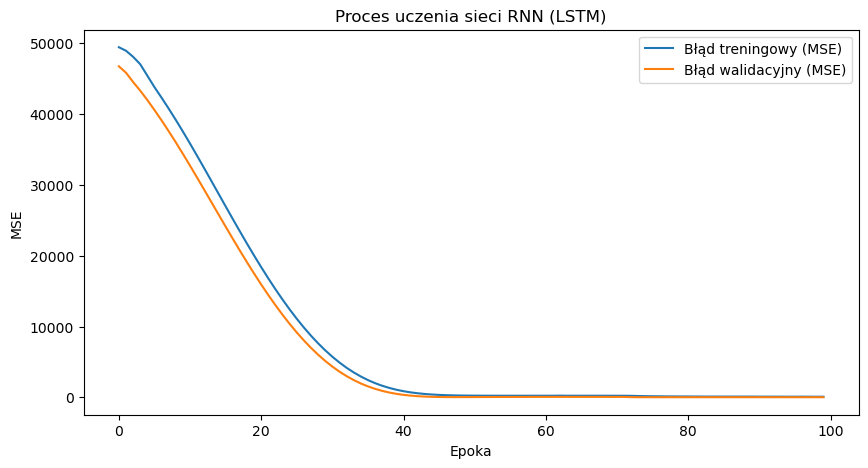

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step


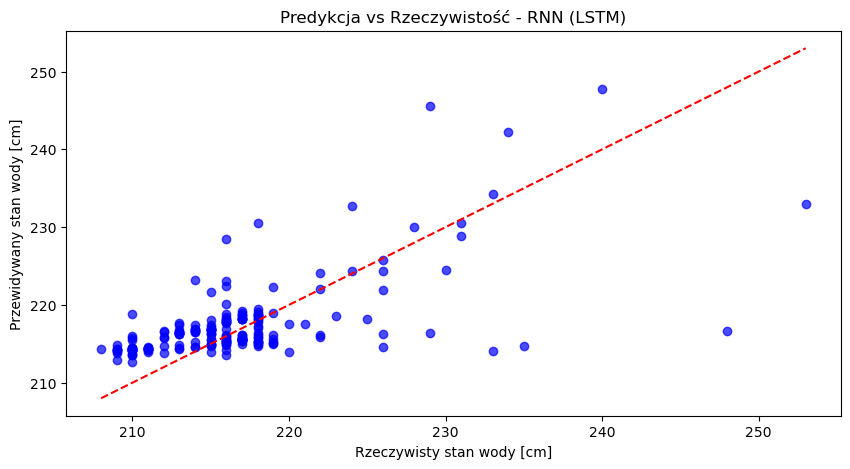

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# 🔹 Wczytanie danych
df = data_stacja.copy()


# 📌 Wybór cech (X) i etykiety (y)
features = ['Przepływ [cm^3/s]']
target = 'Stan wody [cm]'

X = df[features].values
y = df[target].values


In [ ]:
# 📌 Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Tworzenie sekwencji czasowych
time_steps = 1  # Liczba dni w sekwencji
X_seq, y_seq = [], []
for i in range(len(X_scaled) - time_steps):
    X_seq.append(X_scaled[i : i + time_steps])  # Sekwencja `time_steps` dni
    y_seq.append(y[i + time_steps])  # Cel to wartość z dnia po sekwencji

X_seq, y_seq = np.array(X_seq), np.array(y_seq)
print("Kształt X_seq:", X_seq.shape)  # (próbki, kroki czasowe, cechy)

# 📌 Podział danych na zestaw treningowy i testowy
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# 🔹 **Budowa modelu RNN (LSTM)**
model = keras.Sequential([
    layers.LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    layers.BatchNormalization(),
    layers.LSTM(8),
    layers.Dense(4, activation="relu"),
    layers.Dense(1)
])

# 🔹 **Kompilacja modelu**
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 🔹 **Wyświetlenie architektury modelu**
print(model.summary())

# 🔹 **Trening modelu**
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8, verbose=1)

# 🔹 **Wizualizacja procesu uczenia**
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Błąd treningowy (MSE)")
plt.plot(history.history["val_loss"], label="Błąd walidacyjny (MSE)")
plt.xlabel("Epoka")
plt.ylabel("MSE")
plt.legend()
plt.title("Proces uczenia sieci RNN (LSTM)")
plt.show()

# 🔹 **Predykcja na zbiorze testowym**
y_pred = model.predict(X_test)

# 🔹 **Wizualizacja predykcji vs rzeczywistość**
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość - RNN (LSTM)")
plt.show()


### Sieć na podstawie przykładu z https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [26]:
from sklearn.model_selection import train_test_split

In [16]:
# fix random seed for reproducibility
tf.random.set_seed(7)

dataset = data_stacja.copy()

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset["Przepływ [m^3/s]"] = scaler.fit_transform(dataset[["Przepływ [m^3/s]"]])

In [17]:
dataset.head()

,Nazwa stacji,Data,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm],Rodzaj opadu [S/W/],Wysokość pokrywy śnieżnej [cm],Nazwa rzeki/jeziora,Stan wody [cm],Przepływ [m^3/s],Temperatura wody [st. C],Suma dobowa opadów [cm],Przepływ [cm^3/s]
0,PSZCZYNA,2021-01-01,0.7,-1.6,-0.6,-2.3,0.0,W,0,Pszczynka (2116),241,0.315359,99.9,0.00,2080000.0
1,PSZCZYNA,2021-01-02,3.9,-2.4,0.5,-2.5,0.2,W,0,Pszczynka (2116),244,0.349673,99.9,0.02,2290000.0
2,PSZCZYNA,2021-01-03,5.4,-0.4,2.0,-2.0,0.0,NaN,0,Pszczynka (2116),247,0.374183,99.9,0.00,2440000.0
3,PSZCZYNA,2021-01-04,6.4,-0.1,2.2,-3.5,3.9,W,0,Pszczynka (2116),255,0.457516,99.9,0.39,2950000.0
4,PSZCZYNA,2021-01-05,2.2,-0.6,0.6,-3.5,5.1,S,1,Pszczynka (2116),261,0.527778,99.9,0.51,3380000.0


In [67]:
X = dataset[["Przepływ [m^3/s]"]].values
y =  dataset['Stan wody [cm]'].values
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train

array([[0.02287582],
       [0.00326797],
       [0.08823529],
       [0.02124183],
       [0.03267974],
       [0.05065359],
       [0.2369281 ],
       [0.07352941],
       [0.05228758],
       [0.40196078],
       [0.04575163],
       [0.04738562],
       [0.00326797],
       [0.68137255],
       [0.00163399],
       [0.04411765],
       [0.2630719 ],
       [0.02777778],
       [0.08333333],
       [0.5130719 ],
       [0.06535948],
       [0.01960784],
       [0.20915033],
       [0.05555556],
       [0.1748366 ],
       [0.08986928],
       [0.08986928],
       [0.2369281 ],
       [0.05718954],
       [0.00490196],
       [0.13562092],
       [0.00980392],
       [0.03431373],
       [0.04411765],
       [0.04248366],
       [0.1503268 ],
       [0.08823529],
       [0.06372549],
       [0.04575163],
       [0.00980392],
       [0.02614379],
       [0.04248366],
       [0.06045752],
       [0.00980392],
       [0.05882353],
       [0.13562092],
       [0.08496732],
       [0.089

In [62]:
X_train.shape[1]

2

In [69]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1))
# 📌 Kształtowanie danych dla LSTM (RNN wymaga 3D: [samples, time_steps, features])
# X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

In [75]:
X_train.shape, X_test.shape

((866, 1), (217, 1))

ten jakoś wolno się robił

In [102]:
conda install -c conda-forge jupyterthemes


Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kinga\AppData\Local\anaconda3

  added / updated specs:
    - jupyterthemes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       h56e8100_0         155 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    jupyterthemes-0.20.0       |     pyhd8ed1ab_2         4.7 MB  conda-forge
    lesscpy-0.15.1             |     pyhd8ed1ab_1          41 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following NEW packages will be INSTALLED:

  jupyterthemes      conda-forge/noarch::jupyterthemes-0.20.0-pyhd8ed1ab_2 
  lesscpy    



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1




In [103]:
jt -l

NameError: name 'jt' is not defined

In [ ]:
jt -t 

In [101]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(X_train.shape[0], X_train.shape[1]), return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') #trzeba najpierw ustawić compile, 
#żeby model podczas fitowania znał miary, żeby wiedział, co ma minimalizować
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1, verbose=2)

Epoch 1/100
866/866 - 4s - 4ms/step - loss: 48200.6875 - val_loss: 47349.4766
Epoch 2/100
866/866 - 2s - 2ms/step - loss: 45839.8320 - val_loss: 45043.4297
Epoch 3/100
866/866 - 1s - 1ms/step - loss: 43790.0703 - val_loss: 43189.5859
Epoch 4/100
866/866 - 1s - 2ms/step - loss: 42064.8594 - val_loss: 41560.0352
Epoch 5/100
866/866 - 1s - 2ms/step - loss: 40505.9648 - val_loss: 40053.0938
Epoch 6/100
866/866 - 1s - 1ms/step - loss: 39043.9570 - val_loss: 38622.8398
Epoch 7/100
866/866 - 2s - 2ms/step - loss: 37646.0156 - val_loss: 37246.4414
Epoch 8/100
866/866 - 1s - 1ms/step - loss: 36295.2852 - val_loss: 35911.6836
Epoch 9/100
866/866 - 2s - 2ms/step - loss: 34982.4922 - val_loss: 34611.6836
Epoch 10/100
866/866 - 1s - 1ms/step - loss: 33702.3516 - val_loss: 33342.4922
Epoch 11/100
866/866 - 1s - 2ms/step - loss: 32451.7109 - val_loss: 32101.6875
Epoch 12/100
866/866 - 1s - 2ms/step - loss: 31228.6562 - val_loss: 30887.7344
Epoch 13/100
866/866 - 1s - 2ms/step - loss: 30031.9316 - val

In [ ]:
# 🔹 **Wizualizacja procesu uczenia**
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Błąd treningowy (MSE)")
plt.plot(history.history["val_loss"], label="Błąd walidacyjny (MSE)")
plt.xlabel("Epoka")
plt.ylabel("MSE")
plt.legend()
plt.title("Proces uczenia sieci RNN (LSTM)")
plt.show()

# 🔹 **Predykcja na zbiorze testowym**
y_pred = model.predict(X_test)

# 🔹 **Wizualizacja predykcji vs rzeczywistość**
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość - RNN (LSTM)")
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error
import numpy as np

# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# reshape Y_train i Y_test do 2D
trainY = y_train.reshape(-1, 1)
testY = y_test.reshape(-1, 1)

# 🛠 Usuń zbędny wymiar z trainPredict i testPredict
trainPredict = trainPredict.reshape(-1, 1)
testPredict = testPredict.reshape(-1, 1)

# invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Score: 11751348.94 RMSE
Test Score: 13048223.23 RMSE


In [207]:
# history.history

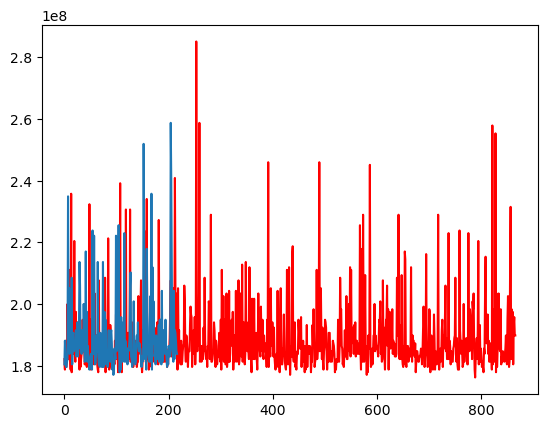

In [95]:
# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(1*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainY, 'red')
plt.plot(testY)
plt.show()

### Moja sieć

In [ ]:
df = data_stacja.copy()

Regresja

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 🔹 Kopia danych
df = data_stacja.copy()

# 📌 Konwersja 'Data' na datetime
df['Data'] = pd.to_datetime(df['Data'])

# 📌 Wybór cech (X) i etykiety (y)
features = ['Przepływ [cm^3/s]', 'Suma dobowa opadów [cm]', 'Średnia temperatura dobowa [°C]']
target = 'Stan wody [cm]'
X = df[features].values
y = df[target].values

# 📌 Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Podział danych
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 **Budowa modelu MLP (Regresja)**
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="linear")  # Regresja
])

# 🔹 **Kompilacja modelu**
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 🔹 **Trening modelu**
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# 🔹 **Predykcja i obliczenie MSE**
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE na zbiorze testowym: {mse:.4f}')


### druga sieć z dodaniem embedingu dla stacji

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 🔹 Wczytanie danych
df = data.copy()

# 📌 Konwersja 'Data' na datetime
df['Data'] = pd.to_datetime(df['Data'])

# 📌 Wybór cech (X) i etykiety (y)
features = ['Przepływ [cm^3/s]', 'Suma dobowa opadów [cm]', 'Średnia temperatura dobowa [°C]']
target = 'Stan wody [cm]'

# 🔹 Kodowanie stacji jako liczby (unikalne ID)
df['station_id'] = df['Nazwa stacji'].astype("category").cat.codes  # Zamiana nazw na numeryczne ID

# 🔹 Parametry Embedding
n_stations = df['station_id'].nunique()  # Liczba unikalnych stacji
embedding_dim = 4  # Wymiar wektora osadzonego

X_features = df[features].values
X_station = df['station_id'].values  # ID stacji
y = df[target].values

# 📌 Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# 📌 Reshape dla LSTM
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (samples, time_steps, features)

# 📌 Podział danych
X_train_features, X_test_features, X_train_station, X_test_station, y_train, y_test = train_test_split(
    X_reshaped, X_station, y, test_size=0.2, random_state=42
)

# 🔹 **Wejścia modelu**
station_input = layers.Input(shape=(1,), name="station_input")  # ID stacji
time_series_input = layers.Input(shape=(X_train_features.shape[1], X_train_features.shape[2]), name="time_series_input")  # Dane czasowe

# 🔹 **Embedding dla stacji**
station_embedding = layers.Embedding(input_dim=n_stations, output_dim=embedding_dim, name="station_embedding")(station_input)
station_embedding = layers.Flatten()(station_embedding)  # Spłaszczamy do 1D

# 🔹 **LSTM dla danych czasowych**
lstm_out = layers.LSTM(64, return_sequences=True, name="lstm_layer")(time_series_input)
lstm_out = layers.BatchNormalization()(lstm_out)
lstm_out = layers.LSTM(32)(lstm_out)

# 🔹 **Łączenie Embedding + LSTM**
merged = layers.Concatenate()([station_embedding, lstm_out])

# 🔹 **Warstwy gęste (Dense)**
dense_out = layers.Dense(16, activation="tanh")(merged)
output = layers.Dense(1, activation="linear", name="output")(dense_out)  # Regresja

# 🔹 **Budowa modelu**
model = keras.Model(inputs=[station_input, time_series_input], outputs=output)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 🔹 **Podgląd modelu**
print(model.summary())

# 🔹 **Trening modelu**
history = model.fit(
    [X_train_station, X_train_features], y_train,
    validation_data=([X_test_station, X_test_features], y_test),
    epochs=10, batch_size=16, verbose=1
)

# 🔹 **Wizualizacja procesu uczenia**
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Błąd treningowy (MSE)")
plt.plot(history.history["val_loss"], label="Błąd walidacyjny (MSE)")
plt.xlabel("Epoka")
plt.ylabel("MSE")
plt.legend()
plt.title("Proces uczenia sieci RNN (LSTM)")
plt.show()

# 🔹 **Predykcja**
y_pred = model.predict([X_test_station, X_test_features])

# 🔹 **Wizualizacja predykcji vs rzeczywistość**
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość - RNN (LSTM)")
plt.show()


Sprawdzanie statystyk modelu

In [ ]:
# 🔹 Dokładność modelu na zbiorze testowym
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🔍 Test Loss (MSE): {test_loss:.4f}")
print(f"🔍 Test MAE: {test_mae:.4f} cm (średni błąd predykcji)")

# 🔹 Statystyki różnicy między predykcją a rzeczywistością
diff = y_test - y_pred.flatten()
print(f"\n📊 Podstawowe statystyki błędu predykcji:")
print(f"  ➤ Średni błąd: {np.mean(diff):.2f} cm")
print(f"  ➤ Mediana błędu: {np.median(diff):.2f} cm")
print(f"  ➤ Odchylenie standardowe błędu: {np.std(diff):.2f} cm")
